In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [2]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [3]:
train["Age"] = train["Age"].fillna(101)

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,101.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""


train['Title'] = train['Name'].apply(get_title)
test["Title"] = test["Name"].apply(get_title)


In [6]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,101.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


test

In [9]:
train = train.drop("Name",axis=1)
test = test.drop("Name",axis=1)

In [10]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C,Rare
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [11]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rare
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,female,101.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr


In [12]:
train = train.drop("Ticket",axis=1)
test = test.drop("Ticket",axis=1)

In [13]:
bine = [0,16,32,48,64,100,102]
labels = [0,1,2,3,4,5]
train["Age"] = pd.cut(train["Age"], bins = bine,labels = labels,right = False)
test["Age"] = pd.cut(test["Age"], bins = bine,labels = labels,right = False)

In [14]:
train["Age"].value_counts()

1    345
2    197
5    177
0     83
3     76
4     13
Name: Age, dtype: int64

In [15]:
bine = [0,8,15,31,1000]
labels = [0,1,2,3]
train["Fare"] = pd.cut(train["Fare"], bins = bine,labels = labels,right = False)
test["Fare"] = pd.cut(test["Fare"], bins = bine,labels = labels,right = False)

In [16]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,male,1,1,0,0,NaN,S,Mr
1,2,1,1,female,2,1,0,3,C85,C,Mrs
2,3,1,3,female,1,0,0,0,NaN,S,Miss
3,4,1,1,female,2,1,0,3,C123,S,Mrs
4,5,0,3,male,2,0,0,1,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,1,0,0,1,NaN,S,Rare
887,888,1,1,female,1,0,0,2,B42,S,Miss
888,889,0,3,female,5,1,2,2,NaN,S,Miss
889,890,1,1,male,1,0,0,2,C148,C,Mr


In [17]:
train["Cabin"] = train["Cabin"].fillna(0)
test["Cabin"] = test["Cabin"].fillna(0)

In [18]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,male,1,1,0,0,0,S,Mr
1,2,1,1,female,2,1,0,3,C85,C,Mrs
2,3,1,3,female,1,0,0,0,0,S,Miss
3,4,1,1,female,2,1,0,3,C123,S,Mrs
4,5,0,3,male,2,0,0,1,0,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,1,0,0,1,0,S,Rare
887,888,1,1,female,1,0,0,2,B42,S,Miss
888,889,0,3,female,5,1,2,2,0,S,Miss
889,890,1,1,male,1,0,0,2,C148,C,Mr


In [19]:
train["Cabin"][train["Cabin"] != 0] = 1
test["Cabin"][test["Cabin"] != 0] = 1

C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\2099286862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Cabin"][train["Cabin"] != 0] = 1
C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\2099286862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Cabin"][test["Cabin"] != 0] = 1


In [20]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,male,1,1,0,0,0,S,Mr
1,2,1,1,female,2,1,0,3,1,C,Mrs
2,3,1,3,female,1,0,0,0,0,S,Miss
3,4,1,1,female,2,1,0,3,1,S,Mrs
4,5,0,3,male,2,0,0,1,0,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,1,0,0,1,0,S,Rare
887,888,1,1,female,1,0,0,2,1,S,Miss
888,889,0,3,female,5,1,2,2,0,S,Miss
889,890,1,1,male,1,0,0,2,1,C,Mr


In [21]:
train["Cabin"].unique()

array([0, 1], dtype=object)

In [22]:
train["Family"] = train["SibSp"]+train["Parch"]+1
test["Family"] = test["SibSp"]+test["Parch"]+1
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family
0,1,0,3,male,1,1,0,0,0,S,Mr,2
1,2,1,1,female,2,1,0,3,1,C,Mrs,2
2,3,1,3,female,1,0,0,0,0,S,Miss,1
3,4,1,1,female,2,1,0,3,1,S,Mrs,2
4,5,0,3,male,2,0,0,1,0,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,1,0,0,1,0,S,Rare,1
887,888,1,1,female,1,0,0,2,1,S,Miss,1
888,889,0,3,female,5,1,2,2,0,S,Miss,4
889,890,1,1,male,1,0,0,2,1,C,Mr,1


In [23]:
train["Alone"] = 0
train["Alone"][train["Family"] == 1] = 1
test["Alone"] = 0
test["Alone"][test["Family"] == 1] = 1

C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\2224071985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Alone"][train["Family"] == 1] = 1
C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\2224071985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Alone"][test["Family"] == 1] = 1


In [24]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family,Alone
0,1,0,3,male,1,1,0,0,0,S,Mr,2,0
1,2,1,1,female,2,1,0,3,1,C,Mrs,2,0
2,3,1,3,female,1,0,0,0,0,S,Miss,1,1
3,4,1,1,female,2,1,0,3,1,S,Mrs,2,0
4,5,0,3,male,2,0,0,1,0,S,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,1,0,0,1,0,S,Rare,1,1
887,888,1,1,female,1,0,0,2,1,S,Miss,1,1
888,889,0,3,female,5,1,2,2,0,S,Miss,4,0
889,890,1,1,male,1,0,0,2,1,C,Mr,1,1


In [25]:
train = train.drop(["SibSp","Parch"],axis = 1)
test = test.drop(["SibSp","Parch"],axis = 1)
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family,Alone
0,1,0,3,male,1,0,0,S,Mr,2,0
1,2,1,1,female,2,3,1,C,Mrs,2,0
2,3,1,3,female,1,0,0,S,Miss,1,1
3,4,1,1,female,2,3,1,S,Mrs,2,0
4,5,0,3,male,2,1,0,S,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,1,1,0,S,Rare,1,1
887,888,1,1,female,1,2,1,S,Miss,1,1
888,889,0,3,female,5,2,0,S,Miss,4,0
889,890,1,1,male,1,2,1,C,Mr,1,1


In [26]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family,Alone
0,1,0,3,male,1,0,0,S,Mr,2,0
1,2,1,1,female,2,3,1,C,Mrs,2,0
2,3,1,3,female,1,0,0,S,Miss,1,1
3,4,1,1,female,2,3,1,S,Mrs,2,0
4,5,0,3,male,2,1,0,S,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,1,1,0,S,Rare,1,1
887,888,1,1,female,1,2,1,S,Miss,1,1
888,889,0,3,female,5,2,0,S,Miss,4,0
889,890,1,1,male,1,2,1,C,Mr,1,1


In [27]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\97970295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"][train["Sex"] == "male"] = 0
C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\97970295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"][train["Sex"] == "female"] = 1
C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\97970295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Sex"][test["Sex"

In [28]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family,Alone
0,1,0,3,0,1,0,0,S,Mr,2,0
1,2,1,1,1,2,3,1,C,Mrs,2,0
2,3,1,3,1,1,0,0,S,Miss,1,1
3,4,1,1,1,2,3,1,S,Mrs,2,0
4,5,0,3,0,2,1,0,S,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,1,0,S,Rare,1,1
887,888,1,1,1,1,2,1,S,Miss,1,1
888,889,0,3,1,5,2,0,S,Miss,4,0
889,890,1,1,0,1,2,1,C,Mr,1,1


In [29]:
train["Title"][train["Title"] == "Mr"] = 0
train["Title"][train["Title"] == "Mrs"] = 1
train["Title"][train["Title"] == "Miss"] = 2
train["Title"][train["Title"] == "Master"] = 3
train["Title"][train["Title"] == "Rare"] = 4
test["Title"][test["Title"] == "Mr"] = 0
test["Title"][test["Title"] == "Mrs"] = 1
test["Title"][test["Title"] == "Miss"] = 2
test["Title"][test["Title"] == "Master"] = 3
test["Title"][test["Title"] == "Rare"] = 4

C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\1188763984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Title"][train["Title"] == "Mr"] = 0
C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\1188763984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Title"][train["Title"] == "Mrs"] = 1
C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\1188763984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Title"

In [30]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family,Alone
0,1,0,3,0,1,0,0,S,0,2,0
1,2,1,1,1,2,3,1,C,1,2,0
2,3,1,3,1,1,0,0,S,2,1,1
3,4,1,1,1,2,3,1,S,1,2,0
4,5,0,3,0,2,1,0,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,1,0,S,4,1,1
887,888,1,1,1,1,2,1,S,2,1,1
888,889,0,3,1,5,2,0,S,2,4,0
889,890,1,1,0,1,2,1,C,0,1,1


In [31]:
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"] = train["Embarked"].fillna(0)
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"] = test["Embarked"].fillna(0)
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2


C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\3846957854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Embarked"][train["Embarked"] == "S"] = 0
C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\3846957854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Embarked"][train["Embarked"] == "C"] = 1
C:\Users\cspde\AppData\Local\Temp\ipykernel_51960\3846957854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trai

In [32]:
train["Embarked"].unique()

array([0, 1, 2], dtype=object)

In [33]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family,Alone
0,1,0,3,0,1,0,0,0,0,2,0
1,2,1,1,1,2,3,1,1,1,2,0
2,3,1,3,1,1,0,0,0,2,1,1
3,4,1,1,1,2,3,1,0,1,2,0
4,5,0,3,0,2,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,1,0,0,4,1,1
887,888,1,1,1,1,2,1,0,2,1,1
888,889,0,3,1,5,2,0,0,2,4,0
889,890,1,1,0,1,2,1,1,0,1,1


In [34]:
train = train.drop(["PassengerId"], axis=1)
test = test.drop(["PassengerId"], axis=1)

In [35]:
test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family,Alone
0,3,0,2,0,0,2,0,1,1
1,3,1,2,0,0,0,1,2,0
2,2,0,3,1,0,2,0,1,1
3,3,0,1,1,0,0,0,1,1
4,3,1,1,1,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...
413,3,0,NaN,1,0,0,0,1,1
414,1,1,2,3,1,1,4,1,1
415,3,0,2,0,0,0,0,1,1
416,3,0,NaN,1,0,0,0,1,1


In [36]:
test["Age"] = test["Age"].fillna(5)

In [37]:
test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family,Alone
0,3,0,2,0,0,2,0,1,1
1,3,1,2,0,0,0,1,2,0
2,2,0,3,1,0,2,0,1,1
3,3,0,1,1,0,0,0,1,1
4,3,1,1,1,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...
413,3,0,5,1,0,0,0,1,1
414,1,1,2,3,1,1,4,1,1
415,3,0,2,0,0,0,0,1,1
416,3,0,5,1,0,0,0,1,1


In [38]:
test["Fare"] = test["Fare"].fillna(0)

In [39]:
test.drop

<bound method DataFrame.drop of      Pclass Sex Age Fare Cabin Embarked Title  Family  Alone
0         3   0   2    0     0        2     0       1      1
1         3   1   2    0     0        0     1       2      0
2         2   0   3    1     0        2     0       1      1
3         3   0   1    1     0        0     0       1      1
4         3   1   1    1     0        0     1       3      0
..      ...  ..  ..  ...   ...      ...   ...     ...    ...
413       3   0   5    1     0        0     0       1      1
414       1   1   2    3     1        1     4       1      1
415       3   0   2    0     0        0     0       1      1
416       3   0   5    1     0        0     0       1      1
417       3   0   5    2     0        1     3       3      0

[418 rows x 9 columns]>

<AxesSubplot: title={'center': 'Pearson Correlation of Features'}>

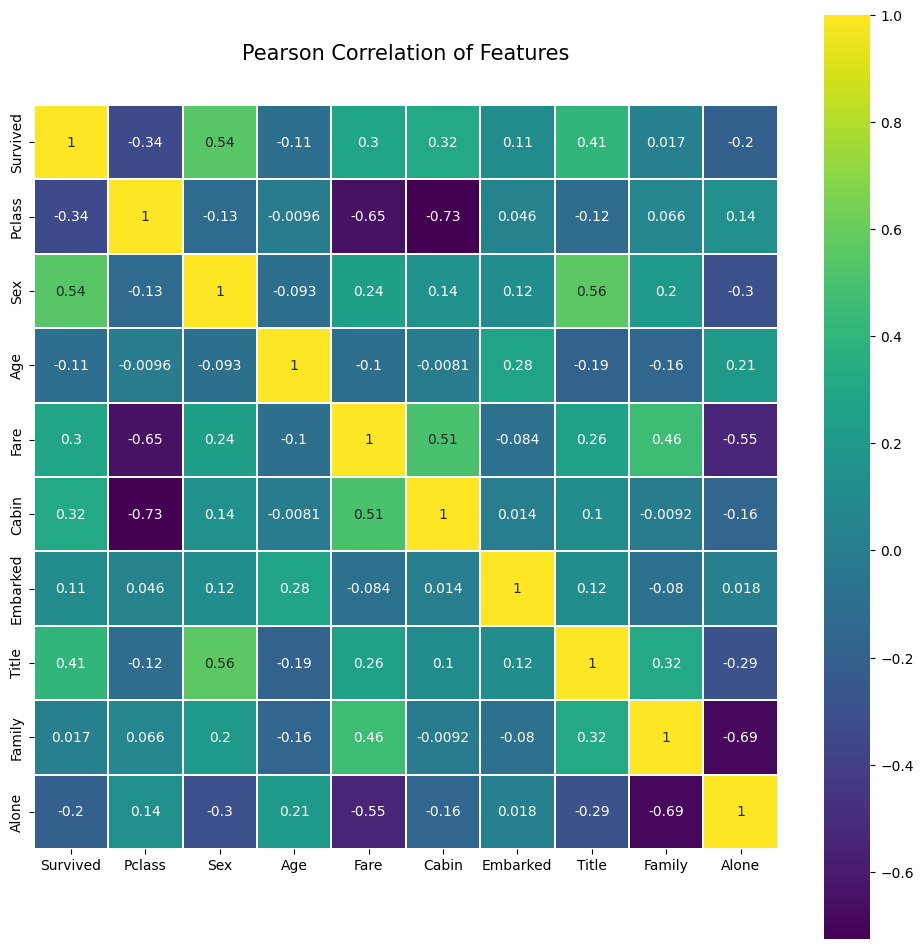

In [40]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [41]:
train["Fare"].unique()

[0, 3, 1, 2]
Categories (4, int64): [0 < 1 < 2 < 3]

In [42]:
ytrain = train["Survived"]
xtrain = train.drop(["Survived"], axis = 1).values


In [43]:
xtrain

array([[3, 0, 1, ..., 0, 2, 0],
       [1, 1, 2, ..., 1, 2, 0],
       [3, 1, 1, ..., 2, 1, 1],
       ...,
       [3, 1, 5, ..., 2, 4, 0],
       [1, 0, 1, ..., 0, 1, 1],
       [3, 0, 2, ..., 0, 1, 1]], dtype=object)

In [44]:
xtest = test.values

In [45]:
xtest

array([[3, 0, 2, ..., 0, 1, 1],
       [3, 1, 2, ..., 1, 2, 0],
       [2, 0, 3, ..., 0, 1, 1],
       ...,
       [3, 0, 2, ..., 0, 1, 1],
       [3, 0, 5, ..., 0, 1, 1],
       [3, 0, 5, ..., 3, 3, 0]], dtype=object)

In [46]:
decisiontree = tree.DecisionTreeClassifier(max_depth = 3)

In [47]:
decisiontree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [49]:
y_predict = decisiontree.predict(xtest)
test["Survived"] = y_predict

In [50]:
test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family,Alone,Survived
0,3,0,2,0,0,2,0,1,1,0
1,3,1,2,0,0,0,1,2,0,1
2,2,0,3,1,0,2,0,1,1,0
3,3,0,1,1,0,0,0,1,1,0
4,3,1,1,1,0,0,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0,5,1,0,0,0,1,1,0
414,1,1,2,3,1,1,4,1,1,1
415,3,0,2,0,0,0,0,1,1,0
416,3,0,5,1,0,0,0,1,1,0


In [51]:
train

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family,Alone
0,0,3,0,1,0,0,0,0,2,0
1,1,1,1,2,3,1,1,1,2,0
2,1,3,1,1,0,0,0,2,1,1
3,1,1,1,2,3,1,0,1,2,0
4,0,3,0,2,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,0,4,1,1
887,1,1,1,1,2,1,0,2,1,1
888,0,3,1,5,2,0,0,2,4,0
889,1,1,0,1,2,1,1,0,1,1


In [62]:
decisiontree.score(xtrain, ytrain)

0.8237934904601572